In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
cctv_seoul = pd.read_csv('../CCTV_in_Seoul.csv', encoding='utf-8')
type(CCTV_seoul)

pandas.core.frame.DataFrame

In [6]:
cctv_seoul

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613
5,광진구,878,573,78,53,174
6,구로구,1884,1142,173,246,323
7,금천구,1348,674,51,269,354
8,노원구,1566,542,57,451,516
9,도봉구,825,238,159,42,386


In [7]:
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [8]:
cctv_seoul.tail()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [10]:
cctv_seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [16]:
cctv_sorted = cctv_seoul.sort_values(by='소계', ascending=False)
cctv_sorted.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


In [15]:
cctv_seoul.rename(columns={cctv_seoul.columns[0]:'구별'}, inplace=True)
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [20]:
CCTV_seoul['증가율'] = (((CCTV_seoul['2014년']+CCTV_seoul['2015년']+
                      CCTV_seoul['2016년'])/CCTV_seoul['2013년도 이전'])*100).round(2)
CCTV_seoul.sort_values(by='증가율', ascending=True).head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년,증가율
18,양천구,2482,1843,142,30,467,34.67
13,서대문구,1254,844,50,68,292,48.58
20,용산구,2096,1368,218,112,398,53.22
5,광진구,878,573,78,53,174,53.23
14,서초구,2297,1406,157,336,398,63.37


In [22]:
pop_seoul = pd.read_excel('../population_in_Seoul.xls', header=2, usecols="B, D, G, J, N") #헤더가 2줄이므로 제거, 임시적으로 이름 등록
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [23]:
pop_seoul.rename(columns={pop_seoul.columns[0]:'구별',
                            pop_seoul.columns[1]:'인구수',
                            pop_seoul.columns[2]:'한국인',
                            pop_seoul.columns[3]:'외국인',
                            pop_seoul.columns[4]:'고령자'},inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [24]:
# 구별 = 합계 는 의미 없으므로 삭제
# 구별의 na값 확인
# na값 확인된 행 삭제
pop_seoul.drop([0], inplace=True) #인덱스, 행(0) 또는 열(1) 
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [28]:
pop_seoul['구별'].values
pop_seoul.tail()
pop_seoul.drop([26], inplace=True)
pop_seoul.tail()

,구별,인구수,한국인,외국인,고령자
21,관악구,525515.0,507203.0,18312.0,68082.0
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0


In [29]:
#외국인 비율 열 추가 : 인구수대비 외국인 비율 계산
pop_seoul['외국인비율'] = ((pop_seoul['외국인']/pop_seoul['인구수'])*100).round(2)

# 고령자 비율 열 추가 : 인구수 대비 고령자 비율
pop_seoul['고령자비율'] = ((pop_seoul['고령자']/pop_seoul['인구수'])*100).round(2)

pop_seoul.sort_values(by='외국인비율').tail()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
3,용산구,244203.0,229456.0,14747.0,36231.0,6.04,14.84
2,중구,133240.0,124312.0,8928.0,20764.0,6.70,15.58
17,구로구,447874.0,416487.0,31387.0,56833.0,7.01,12.69
18,금천구,255082.0,236353.0,18729.0,32970.0,7.34,12.93
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.66,13.01


In [52]:
result = pd.merge(cctv_seoul, pop_seoul)
result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,570500.0,565550.0,4950.0,63167.0,0.87,11.07
1,강동구,1010,379,99,155,377,453233.0,449019.0,4214.0,54622.0,0.93,12.05
2,강북구,831,369,120,138,204,330192.0,326686.0,3506.0,54813.0,1.06,16.60
3,강서구,911,388,258,184,81,603772.0,597248.0,6524.0,72548.0,1.08,12.02
4,관악구,2109,846,260,390,613,525515.0,507203.0,18312.0,68082.0,3.48,12.96


In [53]:
result.set_index('구별', inplace=True)

In [54]:
result.head()

,소계,2013년도 이전,2014년,2015년,2016년,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,,,,
강남구,3238,1292,430,584,932,570500.0,565550.0,4950.0,63167.0,0.87,11.07
강동구,1010,379,99,155,377,453233.0,449019.0,4214.0,54622.0,0.93,12.05
강북구,831,369,120,138,204,330192.0,326686.0,3506.0,54813.0,1.06,16.60
강서구,911,388,258,184,81,603772.0,597248.0,6524.0,72548.0,1.08,12.02
관악구,2109,846,260,390,613,525515.0,507203.0,18312.0,68082.0,3.48,12.96


In [55]:
#2013이전 ~ 2016 컬럼 삭제 drop / del
del result['2013년도 이전']
del result['2014년']
del result['2015년']
del result['2016년']

result.head()

,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,
강남구,3238,570500.0,565550.0,4950.0,63167.0,0.87,11.07
강동구,1010,453233.0,449019.0,4214.0,54622.0,0.93,12.05
강북구,831,330192.0,326686.0,3506.0,54813.0,1.06,16.60
강서구,911,603772.0,597248.0,6524.0,72548.0,1.08,12.02
관악구,2109,525515.0,507203.0,18312.0,68082.0,3.48,12.96


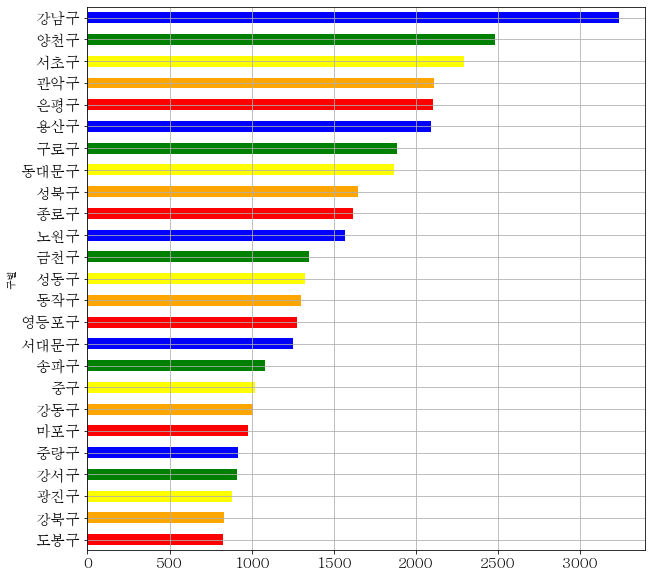

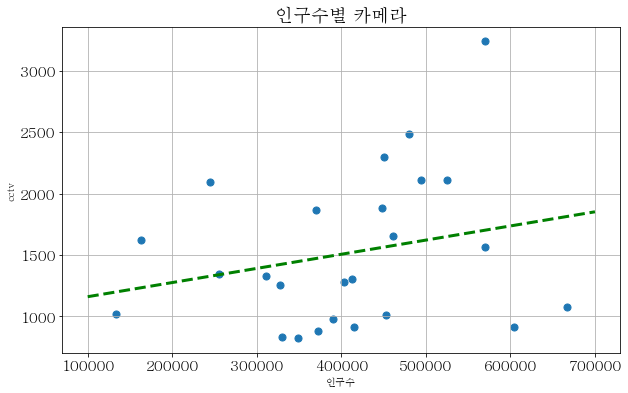

In [65]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Batang'
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.grid'] = True

result["소계"].sort_values().plot(kind='barh', 
                                grid=True, figsize=(10,10), 
                                color=['red','orange','yellow','green','blue'])
plt.show()

result['cctv비율'] = ((result['소계']/result['인구수'])*100).round(2)

import numpy as np
fp = np.polyfit(result['인구수'], result['소계'], 1)
fp


fp1 = np.poly1d(fp)
fx = np.linspace(100000, 700000, 100)


plt.scatter(result['인구수'], result['소계'], s=50) # 둘 사이의 관계를 그래프로
plt.plot(fx, fp1(fx), ls='dashed', lw=3, color="g")
plt.xlabel('인구수')
plt.ylabel('cctv')
plt.title('인구수별 카메라')
plt.show()